In [1]:
import numpy as np
from random import random
import glob
import os
import sys

from astropy.table import Table

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
sizes = [50, 500, 1000, 2000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]

In [120]:
def write(sequence, name):
    with open(name, 'w') as out:
        for val in sequence:
            out.write("{}\n".format(val))    

def gen_rand(size, name):
    data = np.arange(size)
    np.random.shuffle(data)
    write(data, name)

def gen_rev(size, name):
    write(np.arange(size)[::-1], name)
    
def gen_order(size, name):
    write(np.arange(size), name)
    
def gen_repeat(size, name):
    write(np.tile(np.arange(size/10), 10).astype(int), name)

In [121]:
for size in sizes:
    gen_rand(size, "../input/random_{}.txt".format(size))

    gen_rev(size, "../input/reverse_{}.txt".format(size))
    
    gen_order(size, "../input/order_{}.txt".format(size))
    
    gen_repeat(size, "../input/fewunique_{}.txt".format(size))

## Analyze times

In [3]:
def parse_file(filename):
    sizes = []
    times = []
    order = []
    
    for line in open(filename).readlines():
        if line.strip().endswith('calculate'):
            line = line.strip().split(' ')
            order.append(line[2].split('/')[-1].split('_')[0])
            sizes.append(int(line[4]))
            times.append(float(line[7][:-2])/ 10**9)
    
    return order, sizes,times

In [4]:
cat insertion_timing.txt

#--------------------------#
#-- Starting file sorter --#
#--------------------------#
  Reading file ../input/fewunique_1000000.txt
  Found 1000000 items to be sorted.
  insertionsort on ../input/fewunique_1000000.txt with 1000000 items took 256994102673ns to calculate
  Writing output to file: ../output/fewunique_1000000.txt
#--------------------------#
#-- Starting file sorter --#
#--------------------------#
  Reading file ../input/fewunique_100000.txt
  Found 100000 items to be sorted.
  insertionsort on ../input/fewunique_100000.txt with 100000 items took 794128109ns to calculate
  Writing output to file: ../output/fewunique_100000.txt
#--------------------------#
#-- Starting file sorter --#
#--------------------------#
  Reading file ../input/fewunique_10000.txt
  Found 10000 items to be sorted.
  insertionsort on ../input/fewunique_10000.txt with 10000 items took 25703089ns to calculate
  Writing output to file: ../output/fewunique_10000.txt
#--------------------------#
#-- St

In [12]:
def create_table(file_list):
    data = []
    for infile in file_list:
        method = os.path.split(infile)[-1].split('_')[0]
        order, sizes, times = parse_file(infile)
        
        for (o, s, t) in zip(order, sizes, times):
            data.append((method, o, s, round(t, 6)))
            
    t = Table(rows=data, names=('method', 'order', 'size', 'time'))
    
    return t

In [13]:
info = create_table(glob.glob('*timing.txt'))

heap
heaprecursive
insertion
quick
quick100
quick50
quickmed


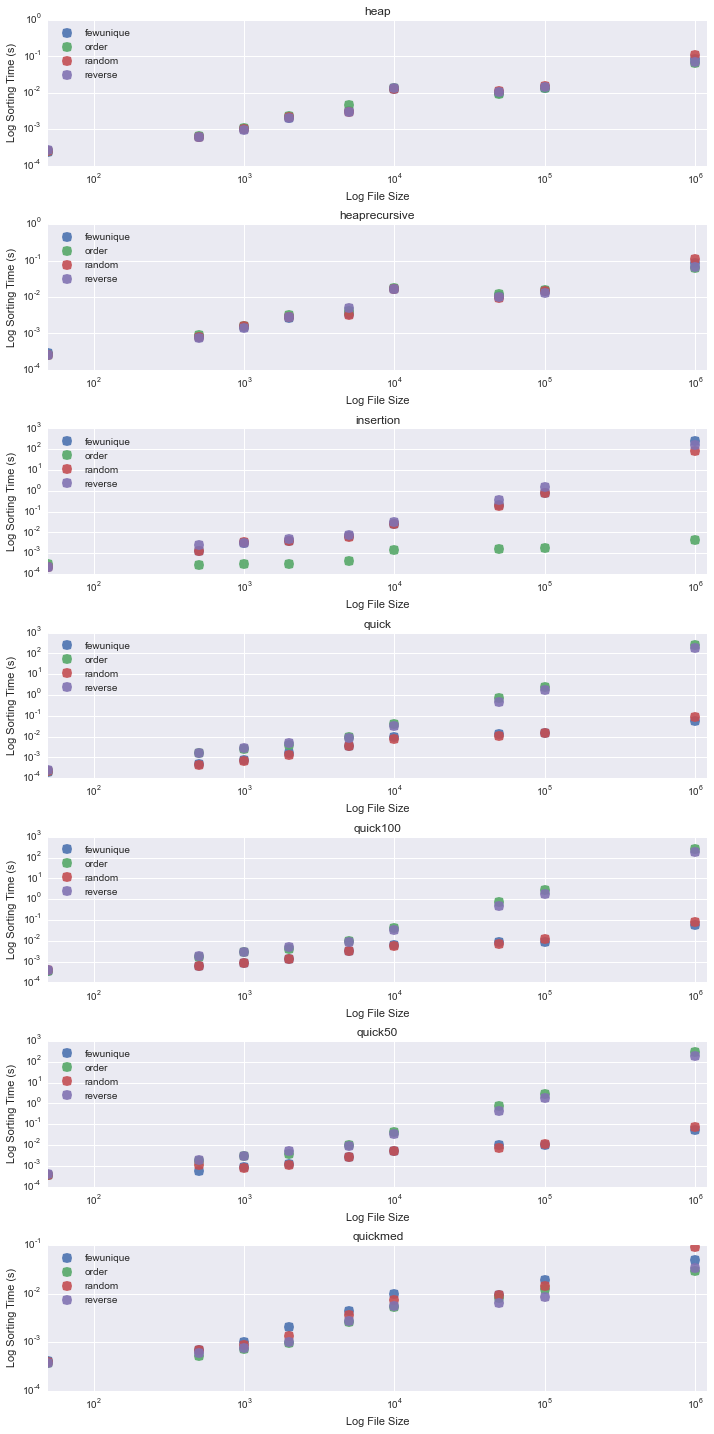

In [14]:
fig = plt.figure(figsize=(10, 20))

methods = sorted(list(set(info['method'])))

for i, method in enumerate(methods):
    print(method)
    ax = fig.add_subplot(len(methods), 1, i+1)
    
    index = np.where(info['method'] == method)[0]
    orders = sorted(list(set(info['order'][index])))
    
    #sindex = np.argsort(info['size'][index])
    #info[index][sindex].write(open('{}.tex'.format(method), 'w'), format='latex')
    
    for order in orders:
        index = np.where((info['method'] == method) &
                         (info['order'] == order))[0]
        
        ax.loglog(info['size'][index], 
                  info['time'][index], 
                  label=order, 
                  marker='o', 
                  ls='', 
                  ms=10,
                  alpha=.9)
        
        
    ax.legend(shadow=True, numpoints=1, loc='upper left')
    ax.set_title(method)
    ax.set_xlabel("Log File Size")
    ax.set_ylabel("Log Sorting Time (s)")
    ax.set_xlim(0, info['size'].max()*1.2)
    
fig.tight_layout()

fig.savefig('sorting_efficiency.pdf')

In [15]:
orderings = list(set(info['order']))
methods = sorted(list(set(info['method'])))
sizes = sorted(list(set(info['size'])))

In [16]:
for o in orderings:
    data = []
    for s in sizes:
        index = np.where((info['order'] == o ) &
                         (info['size'] == s))[0]
        data.append([s] + [info[index]['time'][info[index]['method'] == m].item() for m in methods])
        
    t = Table(rows=data, names=['size'] + methods)

    t.write('{}.tex'.format(o), format='latex')

In [17]:
t

size,heap,heaprecursive,insertion,quick,quick100,quick50,quickmed
int64,float64,float64,float64,float64,float64,float64,float64
50,0.000263,0.00025,0.00022,0.000237,0.000374,0.000391,0.000374
500,0.000615,0.000767,0.00247,0.001697,0.001838,0.001806,0.000587
1000,0.000949,0.001374,0.002956,0.002694,0.00297,0.002993,0.000765
2000,0.002002,0.00291,0.004888,0.00495,0.00506,0.004915,0.001029
5000,0.002915,0.004976,0.007711,0.008681,0.008995,0.008888,0.002771
10000,0.013201,0.016363,0.032004,0.032741,0.034495,0.033554,0.005503
50000,0.010824,0.009857,0.380363,0.467297,0.453685,0.442681,0.006533
100000,0.014268,0.013028,1.511343,1.808753,1.813493,1.809145,0.00865
1000000,0.071608,0.06512,155.514205,181.413635,183.928399,194.786948,0.034295


In [21]:
methods

['heap',
 'heaprecursive',
 'insertion',
 'quick',
 'quick100',
 'quick50',
 'quickmed']

In [185]:
info[index]['time'][info[index]['method'] == 'heap'].item()

0.100491692